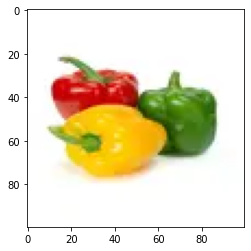

In [1]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow


# Load an image:
image_path = '/content/44.webp'
image = Image.open(image_path)
pixels = image.load()
width, height = image.size

# Display image in notebook:
%matplotlib inline
imshow(np.asarray(image))

In [2]:
# Turn image into list of vectors (1 vector / pixel):
vector_list = []
for x in range(width):
    for y in range(height):
        current_point = []
        current_point.append(pixels[x, y][0])
        current_point.append(pixels[x, y][1])
        current_point.append(pixels[x, y][2])

        current_vector = np.array(current_point)
        vector_list.append(current_vector)

print('Image file with dimensions {}x{} pixels turned into {} vectors.'.format(width, height, len(vector_list)))

Image file with dimensions 100x100 pixels turned into 10000 vectors.


In [4]:
# Function for joining two list with no repeated element
def Union(list1, list2):
    final_list = list(set(list1) | set(list2))
    return final_list
    
# finding the neighbouring element within the radiusilon distance
def range_query(databsc, point, radius, minpoints):
    neighbour = []
    for i in range(0, len(databsc)):
        sec_point = databsc[i]
        # using the euclidean distance formula
        dist = np.linalg.norm(point - sec_point)
        if dist <= radius:
            neighbour.append(i)
    return neighbour

# initializing a list with the same length as vector list with all elements assigned to zero
lable = []
for i in range(0, len(vector_list)):
    lable.append("0")
neighbour = []


In [5]:
# The main DBSCAN function
def DBSCAN(vector_list, radius, minpoints):
    # Initializing cluster counter to  0
    cluster_id = 0
    # taking the first point from vector list to compare 
    for i in range(0, len(vector_list)):
        point = vector_list[i]
        print("The loop for the point has begun ", point)
        if lable[i] == '0':
            print("It has entered this part of the label point")
            neighbour = range_query(vector_list, point, radius, minpoints)
            if len(neighbour) < minpoints:
                print("Not a core Object")
                lable[i] = 0
            else:
                lable[i] = cluster_id 
                #for i in range(0, len(neighbour)):
                 # lable[neighbour[i]] = cluster_id
                # Checking the neighbours of the elements in neighbour
                for iter in range(0, len(neighbour)):
                    if lable[neighbour[iter]] == 0:
                      lable[neighbour[iter]] = cluster_id 
                      print("Wait ......")
                      print()
                      seeds = range_query(vector_list,vector_list[neighbour[iter]], radius, minpoints )
                      if len(seeds) >= minpoints:
                        neighbour = neighbour+seeds

                                       
        cluster_id += 1

    return lable


In [6]:
# Perform clustering on the vectors:
dbscan_clusters = DBSCAN(vector_list, 5, 5)


Streaming output truncated to the last 5000 lines.
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has begun  [255 255 255]
It has entered this part of the label point
The loop for the point has be

<ipython-input-7-cc8b9dcb8545>:23: RuntimeWarning: invalid value encountered in true_divide
  mean_colors[i] = np.divide(mean_colors[i], np.array([counter[i], counter[i], counter[i]]))


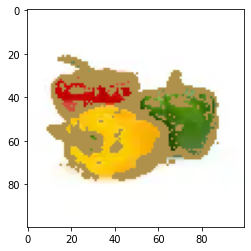

In [7]:
# Convert the clusters back into an image:
# This code assumes that the result is a list that
# is as long as the list of points and contains the 
# cluster number for each point with the corresponding
# position in the list.
# E. g. [1, 4, 2, 1, 1, 4, 2, 2, 3, ...])
def clusters_to_image(cluster_per_point_list: list, points: list, width, height):
    assert(len(cluster_per_point_list) == len(points))

    cluster_count = max(cluster_per_point_list) + 1
    inverted_clusters = [[] for _ in range(cluster_count)]

    for i in range(len(cluster_per_point_list)):
        inverted_clusters[cluster_per_point_list[i]].append(points[i])

    mean_colors = [np.array([0, 0, 0]) for _ in range(cluster_count)]
    counter =  [0 for _ in range(cluster_count)]
    for i in range(cluster_count):
        for elem in inverted_clusters[i]:
            mean_colors[i] = np.add(mean_colors[i], elem)
            counter[i] += 1

        mean_colors[i] = np.divide(mean_colors[i], np.array([counter[i], counter[i], counter[i]]))

    clustered_image = Image.new('RGB', (width, height))
    pix = clustered_image.load()
    for x in range(width):
        for y in range(height):
            cl_id = cluster_per_point_list[y + x * height]
            if cl_id == -1:
                pix[x, y] = (0, 0, 0)
            else:
                curr_pixel = [int(x) for x in mean_colors[cl_id]]
                pix[x, y] = tuple(curr_pixel)

    return clustered_image

clustered_image = clusters_to_image(
    dbscan_clusters, vector_list, width, height)

# Display the clustered image:
%matplotlib inline
imshow(np.asarray(clustered_image))